## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

In [0]:
#a = []
#while(1):
 #   a.append('1')

### Load Dataset Files

In [1]:
## Importing the tensorflow version
import tensorflow as tf
print(tf.__version__)
tf.set_random_seed(42)

1.15.0


In [3]:
## Mounting the drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
import numpy as np
import pandas as pd
%matplotlib inline
import os
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from sklearn import metrics
from keras.utils.np_utils import to_categorical
from subprocess import check_output

Using TensorFlow backend.


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/gdrive/My Drive/AIML/Dog_Breed/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
title=pd.read_csv("/content/gdrive/My Drive/AIML/Dog_Breed/labels.csv")

In [11]:
title.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [12]:
title.shape

(10222, 2)

In [0]:
pd.set_option('display.max_rows', None)

### Print the count of each category of Dogs given in the dataset



In [14]:
title.breed.value_counts()

scottish_deerhound                126
maltese_dog                       117
afghan_hound                      116
entlebucher                       115
bernese_mountain_dog              114
shih-tzu                          112
pomeranian                        111
great_pyrenees                    111
basenji                           110
samoyed                           109
airedale                          107
tibetan_terrier                   107
cairn                             106
leonberg                          106
beagle                            105
japanese_spaniel                  105
australian_terrier                102
blenheim_spaniel                  102
miniature_pinscher                102
irish_wolfhound                   101
saluki                             99
lakeland_terrier                   99
papillon                           96
whippet                            95
norwegian_elkhound                 95
siberian_husky                     95
pug         

In [0]:
a=title.breed.unique()

In [16]:
a.shape

(120,)

In [17]:
a[0:5]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever'],
      dtype=object)

### Get one-hot encodings of labels

In [18]:
## Preprocessing the labels
labels = preprocessing.LabelEncoder()
labels.fit(a)
encodedlabels = labels.transform(title.breed)
print('\n')
print('Classes'+str(labels.classes_))



Classes['affenpinscher' 'afghan_hound' 'african_hunting_dog' 'airedale'
 'american_staffordshire_terrier' 'appenzeller' 'australian_terrier'
 'basenji' 'basset' 'beagle' 'bedlington_terrier' 'bernese_mountain_dog'
 'black-and-tan_coonhound' 'blenheim_spaniel' 'bloodhound' 'bluetick'
 'border_collie' 'border_terrier' 'borzoi' 'boston_bull'
 'bouvier_des_flandres' 'boxer' 'brabancon_griffon' 'briard'
 'brittany_spaniel' 'bull_mastiff' 'cairn' 'cardigan'
 'chesapeake_bay_retriever' 'chihuahua' 'chow' 'clumber' 'cocker_spaniel'
 'collie' 'curly-coated_retriever' 'dandie_dinmont' 'dhole' 'dingo'
 'doberman' 'english_foxhound' 'english_setter' 'english_springer'
 'entlebucher' 'eskimo_dog' 'flat-coated_retriever' 'french_bulldog'
 'german_shepherd' 'german_short-haired_pointer' 'giant_schnauzer'
 'golden_retriever' 'gordon_setter' 'great_dane' 'great_pyrenees'
 'greater_swiss_mountain_dog' 'groenendael' 'ibizan_hound' 'irish_setter'
 'irish_terrier' 'irish_water_spaniel' 'irish_wolfhound'


In [19]:
print(encodedlabels)

[19 37 85 ...  3 75 28]


In [0]:
y=to_categorical(encodedlabels)

In [21]:
y.shape

(10222, 120)

In [22]:
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_rows=128
img_cols=128

In [0]:
from tqdm import tqdm
import cv2
x_feature=[]
y_feature=[]

for f, img in tqdm(title.values):
  train_img=cv2.imread(project_path+'train/{}.jpg'.format(f),3)
  train_img_resize=cv2.resize(train_img,(img_rows,img_cols))
  x_feature.append(train_img_resize)
  y_feature.append(img)

100%|██████████| 10222/10222 [54:37<00:00,  6.73it/s]


Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
x_feature=np.array(x_feature)

In [0]:
y_feature=np.array(y_feature)

In [0]:
x_feature=pd.read_pickle('/content/gdrive/My Drive/AIML/Dog_Breed/X.pkl')
y_feature=pd.read_pickle('/content/gdrive/My Drive/AIML/Dog_Breed/y.pkl')

In [0]:
x_feature.dump('/content/gdrive/My Drive/AIML/Dog_Breed/X.pkl')
y_feature.dump('/content/gdrive/My Drive/AIML/Dog_Breed/y.pkl')

In [25]:
## Preprocessing the labels
labels = preprocessing.LabelEncoder()
labels.fit(np.unique(y_feature))
encodedlabels1 = labels.transform(y_feature)
print('\n')
print('Classes'+str(labels.classes_))



Classes['affenpinscher' 'afghan_hound' 'african_hunting_dog' 'airedale'
 'american_staffordshire_terrier' 'appenzeller' 'australian_terrier'
 'basenji' 'basset' 'beagle' 'bedlington_terrier' 'bernese_mountain_dog'
 'black-and-tan_coonhound' 'blenheim_spaniel' 'bloodhound' 'bluetick'
 'border_collie' 'border_terrier' 'borzoi' 'boston_bull'
 'bouvier_des_flandres' 'boxer' 'brabancon_griffon' 'briard'
 'brittany_spaniel' 'bull_mastiff' 'cairn' 'cardigan'
 'chesapeake_bay_retriever' 'chihuahua' 'chow' 'clumber' 'cocker_spaniel'
 'collie' 'curly-coated_retriever' 'dandie_dinmont' 'dhole' 'dingo'
 'doberman' 'english_foxhound' 'english_setter' 'english_springer'
 'entlebucher' 'eskimo_dog' 'flat-coated_retriever' 'french_bulldog'
 'german_shepherd' 'german_short-haired_pointer' 'giant_schnauzer'
 'golden_retriever' 'gordon_setter' 'great_dane' 'great_pyrenees'
 'greater_swiss_mountain_dog' 'groenendael' 'ibizan_hound' 'irish_setter'
 'irish_terrier' 'irish_water_spaniel' 'irish_wolfhound'


In [26]:
print(encodedlabels1)

[19 37 85 ...  3 75 28]


In [27]:
x_feature.shape

(10222, 128, 128, 3)

In [0]:
x_train_data=x_feature/255

In [0]:
y_train_data=to_categorical(encodedlabels1)

In [30]:
print("Features shape:",x_train_data.shape)
print("Labels shape:",y_train_data.shape)

Features shape: (10222, 128, 128, 3)
Labels shape: (10222, 120)


In [31]:
x_train_data[0:1]

array([[[[0.27058824, 0.45490196, 0.67843137],
         [0.14901961, 0.35686275, 0.53333333],
         [0.4       , 0.65098039, 0.8       ],
         ...,
         [0.50980392, 0.8       , 0.92941176],
         [0.33333333, 0.75686275, 0.8627451 ],
         [0.23137255, 0.54117647, 0.66666667]],

        [[0.16470588, 0.30196078, 0.4627451 ],
         [0.55686275, 0.70588235, 0.84705882],
         [0.46666667, 0.63529412, 0.77254902],
         ...,
         [0.31372549, 0.59607843, 0.76078431],
         [0.39607843, 0.71764706, 0.85490196],
         [0.29019608, 0.69411765, 0.83137255]],

        [[0.25490196, 0.41960784, 0.59215686],
         [0.22352941, 0.40392157, 0.57647059],
         [0.25882353, 0.41960784, 0.6       ],
         ...,
         [0.14509804, 0.4745098 , 0.6745098 ],
         [0.28627451, 0.56862745, 0.71764706],
         [0.25098039, 0.65882353, 0.81176471]],

        ...,

        [[0.30196078, 0.46666667, 0.74509804],
         [0.25882353, 0.4745098 , 0.72941176]

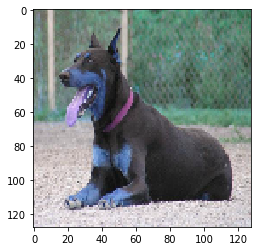

In [32]:
## Displaying randomly a image from X
plt.imshow(x_train_data[20])

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
x_train,x_val,y_train,y_val=train_test_split(x_train_data,y_train_data,test_size=0.30,random_state=50)

In [34]:
print("Training Data shape:",x_train.shape,y_train.shape)
print("Validation Data shape:",x_val.shape,y_val.shape)

Training Data shape: (7155, 128, 128, 3) (7155, 120)
Validation Data shape: (3067, 128, 128, 3) (3067, 120)


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
sample=pd.read_csv("/content/gdrive/My Drive/AIML/Dog_Breed/sample_submission.csv")

In [0]:
test_img=sample["id"]

In [37]:
test_img.shape

(10357,)

Run the below code to load the test image files in x_test_feature

In [0]:
from tqdm import tqdm
import cv2
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread(project_path+'test/{}.jpg'.format(f), 3)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [34:14<00:00,  5.87it/s]


Normalize the test data and convert it into 4 dimensions

In [0]:
x_test_feature=np.array(x_test_feature)

In [39]:
x_test_data=x_test_feature/255
print("Test Data shape:",x_test_data.shape)

Test Data shape: (10357, 128, 128, 3)


In [0]:
x_test_feature.dump('/content/gdrive/My Drive/AIML/Dog_Breed/X_test.pkl')

In [0]:
x_test_feature=pd.read_pickle('/content/gdrive/My Drive/AIML/Dog_Breed/X_test.pkl')

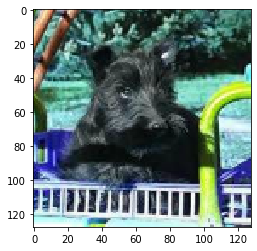

In [40]:
plt.imshow(x_test_data[20])

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [41]:
# Create a model
model1= Sequential()
## Adding convolution layers with 32 filters of 3*3 size and mentioning input shape with relu activation
model1.add(Conv2D(32, kernel_size=(5, 5), input_shape=(128, 128, 3), activation='relu'))
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
## Adding a dropout layer of rate 0.2
model1.add(Dropout(0.2))
## Flattening the output of convolution layer
model1.add(Flatten())
## Adding a dense layer with 128 neurons and relu activation
model1.add(Dense(256, activation='relu'))
model1.add(keras.layers.BatchNormalization())
## Adding the output layer
model1.add(Dense(120, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [42]:
## Compiling the model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )
model1.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 122, 122, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 61, 61, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 119072)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               30482688  
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)            

### Use batch_size = 128 and epochs = 10 and execute the model

In [43]:
# Fit the model
early_stopping = EarlyStopping(monitor='val_acc', patience=5, mode='auto')
callback_list = [early_stopping]

model1.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=128 , callbacks=callback_list)

# Final evaluation of the model
scores = model1.evaluate(x_val, y_val, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7155 samples, validate on 3067 samples
Epoch 1/10





7155/7155 [==============================] - 73s 10ms/step - loss: 4.7380 - acc: 0.0260 - val_loss: 4.7411 - val_acc: 0.0248
Epoch 2/10
7155/7155 [==============================] - 73s 10ms/step - loss: 4.2314 - acc: 0.0819 - val_loss: 5.2752 - val_acc: 0.0173
Epoch 3/10
7155/7155 [==============================] - 69s 10ms/step - loss: 2.8899 - acc: 0.4112 - val_loss: 5.3747 - val_acc: 0.0068
Epoch 4/10
7155/7155 [==============================] - 73s 10ms/step - loss: 0.7831 - acc: 0.9490 - val_loss: 5.7036 - val_acc: 0.0127
Epoch 5/10
7155/7155 [==============================] - 69s 10ms/step - loss: 0.1079 - acc: 0.9989 - val_loss: 5.2471 - val_acc: 0.0127
Epoch 6/10
7155/7155 [==============================] - 69s 10ms/step - loss: 0.0298 - acc: 0.9996 - val_loss: 5.0392 - val_acc: 0.0150
Accuracy: 1.50%


#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
train_gen = ImageDataGenerator(rotation_range=15,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

In [0]:
val_gen = ImageDataGenerator(rotation_range=15,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator=train_gen.flow(x_train,y_train,batch_size=128)

In [0]:
val_generator=val_gen.flow(x_val,y_val,batch_size=128)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [48]:
model1.fit_generator(train_generator,validation_data=val_generator, epochs=10, callbacks=callback_list)

Epoch 1/10
56/56 [==============================] - 69s 1s/step - loss: 4.4839 - acc: 0.0563 - val_loss: 6.6872 - val_acc: 0.0313
Epoch 2/10
56/56 [==============================] - 66s 1s/step - loss: 4.2663 - acc: 0.0702 - val_loss: 4.7667 - val_acc: 0.0434
Epoch 3/10
56/56 [==============================] - 67s 1s/step - loss: 4.1499 - acc: 0.0837 - val_loss: 4.6487 - val_acc: 0.0502
Epoch 4/10
56/56 [==============================] - 66s 1s/step - loss: 4.0694 - acc: 0.0971 - val_loss: 4.6248 - val_acc: 0.0558
Epoch 5/10
56/56 [==============================] - 67s 1s/step - loss: 3.9858 - acc: 0.1094 - val_loss: 4.5107 - val_acc: 0.0525
Epoch 6/10
56/56 [==============================] - 66s 1s/step - loss: 3.9119 - acc: 0.1164 - val_loss: 4.5347 - val_acc: 0.0577
Epoch 7/10
56/56 [==============================] - 66s 1s/step - loss: 3.8559 - acc: 0.1282 - val_loss: 4.3976 - val_acc: 0.0721
Epoch 8/10
56/56 [==============================] - 66s 1s/step - loss: 3.7947 - acc: 0.14

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg weight file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),include_top=False,input_shape=(128,128,3,))

Print the summary of the base_model

In [50]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
flatten1=Flatten()
dense1=Dense(1024,activation='relu',name='dense1')
dense2=Dense(256,activation='relu',name='dense2')
output=Dense(120,activation='softmax',name='output')

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
base_model.trainable=False

In [0]:
model2=Sequential([base_model,flatten1,dense1,dense2,output])

In [60]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense1 (Dense)               (None, 1024)              8389632   
_________________________________________________________________
dense2 (Dense)               (None, 256)               262400    
_________________________________________________________________
output (Dense)               (None, 120)               30840     
Total params: 23,397,560
Trainable params: 8,682,872
Non-trainable params: 14,714,688
_________________________________________________________________


### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [61]:
model2.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=128 , callbacks=callback_list)

Train on 7155 samples, validate on 3067 samples
Epoch 1/20
7155/7155 [==============================] - 107s 15ms/step - loss: 4.7486 - acc: 0.0217 - val_loss: 4.5827 - val_acc: 0.0398
Epoch 2/20
7155/7155 [==============================] - 106s 15ms/step - loss: 4.2113 - acc: 0.0827 - val_loss: 4.1244 - val_acc: 0.0809
Epoch 3/20
7155/7155 [==============================] - 106s 15ms/step - loss: 3.5010 - acc: 0.1852 - val_loss: 3.8165 - val_acc: 0.1324
Epoch 4/20
7155/7155 [==============================] - 106s 15ms/step - loss: 2.9121 - acc: 0.2841 - val_loss: 3.7116 - val_acc: 0.1513
Epoch 5/20
7155/7155 [==============================] - 103s 14ms/step - loss: 2.4803 - acc: 0.3723 - val_loss: 3.4538 - val_acc: 0.1858
Epoch 6/20
7155/7155 [==============================] - 103s 14ms/step - loss: 2.0545 - acc: 0.4745 - val_loss: 3.5230 - val_acc: 0.1777
Epoch 7/20
7155/7155 [==============================] - 102s 14ms/step - loss: 1.6974 - acc: 0.5713 - val_loss: 3.5481 - val_acc: 